In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from keras.datasets import mnist

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
from keras.utils import np_utils
import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

[]


Using TensorFlow backend.


In [6]:
(xtrain,ytrain),(xvalid,yvalid)=mnist.load_data()
xtrain1=xtrain.astype('float32')/255
xvalid1=xvalid.astype('float32')/255

11493376/11490434 [==============================] - 2s 0us/step


In [7]:
ytrain1=np_utils.to_categorical(ytrain,10)
yvalid1=np_utils.to_categorical(yvalid,10)

In [8]:
xtrain1.shape

(60000, 28, 28)

In [9]:

lr=0.001
trainingsteps=10000
batch_size=128
n_lstm=256
disp_step=200
n_inputs=28
n_steps=28
n_classes=10
X=tf.placeholder('float32',[None,n_steps,n_inputs])
Y=tf.placeholder('float32',[None,n_classes])

In [10]:
W=tf.Variable(tf.random.truncated_normal(shape=[n_lstm,n_classes]))
b=tf.Variable(tf.random.truncated_normal([n_classes,]))


In [11]:
x=tf.unstack(X,axis=1)  # creates list of section of batches at different timestamps
LSTM_cell=tf.nn.rnn_cell.BasicLSTMCell(num_units=n_lstm,forget_bias=1.0)
outputs,states=tf.contrib.rnn.static_rnn(LSTM_cell,x,dtype=tf.float32)


Instructions for updating:
This class is deprecated, please use tf.nn.rnn_cell.LSTMCell, which supports all the feature this cell currently has. Please replace the existing code with tf.nn.rnn_cell.LSTMCell(name='basic_lstm_cell').


In [12]:
print(len(x))
x[0].get_shape()

28


TensorShape([Dimension(None), Dimension(28)])

In [13]:
len(outputs)
outputs[-1].get_shape() # gives the last hidden state of last time stamp across each example of batch

TensorShape([Dimension(None), Dimension(256)])

In [14]:
y=tf.matmul(outputs[-1],W)+b
y.get_shape()

TensorShape([Dimension(None), Dimension(10)])

In [15]:
prediction=tf.nn.softmax(y,axis=1)

In [16]:
loss=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=y,labels=Y))

In [17]:
optimizer=tf.train.GradientDescentOptimizer(learning_rate=lr)
train_op=optimizer.minimize(loss)

In [18]:
#Evaluation 
correct_pred=tf.equal(tf.argmax(y,axis=1),tf.argmax(Y,axis=1))
accuracy=tf.reduce_mean(tf.cast(correct_pred,tf.float32))
init=tf.global_variables_initializer()

In [19]:
trainloss=[]
testloss=[]
with tf.Session() as s:
    s.run(init)
    for i in range(trainingsteps):
        rand=np.random.choice(len(xtrain1),batch_size)
        batch_x=xtrain1[rand]
        batch_y=ytrain1[rand]
       # print(type(batch_x),type(batch_y))
        _=s.run(train_op,feed_dict={X:batch_x,Y:batch_y})
        if ((i+1)% disp_step)==0:
            loss1,acc1=s.run([loss,accuracy],feed_dict={X:batch_x,Y:batch_y})
            print("at step:",i+1," training loss:",loss1 ,"and training accuracy:",acc1)
            #print(type(loss1))
            #print(type(acc1))
            trainloss.append(loss1)
            testl,testa=s.run([loss,accuracy],feed_dict={X:xvalid1,Y:yvalid1})
            testloss.append(testl)
            print("test accuracy:",testa)

at step: 200  training loss: 2.0922184 and training accuracy: 0.2734375
test accuracy: 0.3457
at step: 400  training loss: 1.8351346 and training accuracy: 0.4453125
test accuracy: 0.429
at step: 600  training loss: 1.6636502 and training accuracy: 0.484375
test accuracy: 0.4867
at step: 800  training loss: 1.604189 and training accuracy: 0.46875
test accuracy: 0.5251
at step: 1000  training loss: 1.5045655 and training accuracy: 0.546875
test accuracy: 0.5578
at step: 1200  training loss: 1.4015945 and training accuracy: 0.5625
test accuracy: 0.5971
at step: 1400  training loss: 1.2903507 and training accuracy: 0.6015625
test accuracy: 0.6251
at step: 1600  training loss: 1.356894 and training accuracy: 0.546875
test accuracy: 0.6475
at step: 1800  training loss: 1.2112839 and training accuracy: 0.640625
test accuracy: 0.6607
at step: 2000  training loss: 1.0935866 and training accuracy: 0.6875
test accuracy: 0.6742
at step: 2200  training loss: 1.1433812 and training accuracy: 0.6718

In [21]:

import matplotlib.pyplot as plt

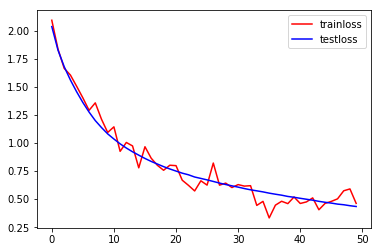

In [22]:
plt.plot(trainloss,'r',label='trainloss')
plt.plot(testloss,'b',label='testloss')
plt.legend()